In [7]:
import pystan
import numpy as np
import pandas as pd
from scipy import stats as sts
import matplotlib.pyplot as plt
from IPython.display import display

In [8]:
'''
For the data pre-processing, I am assigning the neighborhood names for each student 
'''
london_students = [
"Gelana Tostaeva",
"Sara Merner",
"Gera",
"Evan Buckman",
"Frances Pak",
"Erika Sloan",
"Sonia",
"Michelle Hackl",
"Mandla",
"Nikesh Shrestha",
"Hana Mcmahon-Cole",
"Barbara"]
San_Francisco_students = [" Jingren", "Vu"]

### Data Pre-processing

Pre-processing the responce data

In [9]:
"""
Read the CSV file that conatins all enteries as updated in Nov 7th
"""
rawdata = pd.read_csv("CS146 LBA data gathering (Fall 2019) (Responses) - Form Responses 1(1) .csv")
#Take a peak into the data
rawdata.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Apples,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Chicken breasts,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,Timestamp,Email Address,Your name,Grocery store,Grocery store street address,Product 1 quantity (kg),Product 1 price (€),Product 2 quantity (kg),Product 2 price (€),Product 3 quantity (kg),...,Product 2 quantity (count),Product 2 price (€),Product 3 quantity (count),Product 3 price (€),Product 1 quantity (kg),Product 1 price (€),Product 2 quantity (kg),Product 2 price (€),Product 3 quantity (kg),Product 3 price (€)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/28/2019 13:14:59,brian.swanberg@minerva.kgi.edu,Brian Swanberg,ALDI,Rummelsburger Str. 98,0.88,2.2,1,1.88,0.6,...,6,1.59,10,1.59,0.6,3.99,1,5.99,NaN,NaN
3,10/29/2019 14:19:19,emma.stiefel@minerva.kgi.edu,Emma Stiefel,REWE,Karl-Marx-Straße 92-98,1,2.49,1,1.49,1,...,1,0.25,6,1.59,1,13.9,1,9.99,1,9.98
4,10/29/2019 21:22:30,taha@minerva.kgi.edu,Taha,ALDI,"Hermannstraße 72, 12049 Berlin, Germany",1,2.99,1,1.79,0.8,...,10,1.19,6,1.59,0.6,3.99,1,5.99,0.35,3.99


In [10]:
"""
Change the name of the columns and remove unnecssary info: TimeStamp and Email Address 
"""
rawdata.columns = rawdata.iloc[0]
rawdata = rawdata.drop([0,1], axis= 0)


In [11]:
responcedata = rawdata.drop(["Timestamp", "Email Address"], axis= 1)

In [12]:
responcedata.rename({'Grocery store street address': 'Supermarket'}, axis=1, inplace=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [13]:
responcedata.head()

,Your name,Grocery store,Supermarket,Product 1 quantity (kg),Product 1 price (€),Product 2 quantity (kg),Product 2 price (€),Product 3 quantity (kg),Product 3 price (€),Product 1 quantity (kg),...,Product 2 quantity (count),Product 2 price (€),Product 3 quantity (count),Product 3 price (€),Product 1 quantity (kg),Product 1 price (€),Product 2 quantity (kg),Product 2 price (€),Product 3 quantity (kg),Product 3 price (€)
2,Brian Swanberg,ALDI,Rummelsburger Str. 98,0.88,2.2,1,1.88,0.6,1.89,1,...,6,1.59,10,1.59,0.6,3.99,1,5.99,NaN,NaN
3,Emma Stiefel,REWE,Karl-Marx-Straße 92-98,1,2.49,1,1.49,1,2.49,1,...,1,0.25,6,1.59,1,13.9,1,9.99,1,9.98
4,Taha,ALDI,"Hermannstraße 72, 12049 Berlin, Germany",1,2.99,1,1.79,0.8,1.89,1,...,10,1.19,6,1.59,0.6,3.99,1,5.99,0.35,3.99
5,Michael Hao Chen,Lidl,"Lidl, Leipziger Str. 42",1,1.79,0.75,1.99,0.8,1.89,1,...,10,1.69,10,2.65,0.6,3.99,0.4,2.79,NaN,NaN
6,Michael Hao Chen,REWE,"REWE, Landsberger Allee 68D",0.65,2.49,1,2.19,1,1.49,1,...,6,2.29,12,1.99,0.41,5.34,0.249,2.49,0.285,8.52


Pre-processing the original assigmnent data

In [14]:
"""
Do the same pre-procesing steps to the initial assignment sheet.
Change the name of the columns and remove the excess raw that
the has NA values for each entery
"""
df = pd.read_csv("CS146, Fall 2019, LBA data collection - Berlin supermarkets.csv")
df.columns = df.iloc[2]
df = df.drop(df.index[2])
assigneddata = df.drop([0,1], axis = 0)
assigneddata =  assigneddata.drop(["Student index","Map location", "GPS", "Estimated travel time (min)"], axis = 1)
assigneddata.head()

2,Student name,Supermarket,Neighborhood
3,Berfin,"ALDI, Eisenbahnstraße 42",Kreuzberg
4,Khoi,"EDEKA, Annenstraße 4A",Mitte
5,Sanny,"EDEKA, Fischerinsel 12",Mitte
6,Ayo,"REWE, Skalitzer Str. 134",Kreuzberg
7,Trang,"Lidl, Heinrich-Heine-Straße 30",Mitte


In [15]:
"""
Since we are trying to add the column of the neighborhood to the response data, 
we will match each entry in the response data to the supermarket address. To 
achieve maximized efficiency, we removed all numbers or special characters.
"""
assigneddata[["Supermarket"]] = assigneddata[["Supermarket"]].replace(r'(?:.*, )*(.*), [0-9]+.*', r'\1', regex=True)
display(assigneddata.head())


2,Student name,Supermarket,Neighborhood
3,Berfin,"ALDI, Eisenbahnstraße 42",Kreuzberg
4,Khoi,"EDEKA, Annenstraße 4A",Mitte
5,Sanny,"EDEKA, Fischerinsel 12",Mitte
6,Ayo,"REWE, Skalitzer Str. 134",Kreuzberg
7,Trang,"Lidl, Heinrich-Heine-Straße 30",Mitte


In [16]:
# drop the unknown values in the pre-assigned data. 
#Make a new dataframe that contains only the important infromation for matching.
neighborhoods = assigneddata[[
    "Student name", "Supermarket", "Neighborhood"]].dropna()[["Supermarket", "Neighborhood"]]
#Make the supermarket data lower case to ease the matching 
neighborhoods.Supermarket = neighborhoods.Supermarket.str.lower()
responcedata.Supermarket = responcedata.Supermarket.str.lower()
#The assignment data had the name of the store in the address which is redundent. 
neighborhoods[["Supermarket"]] = neighborhoods[["Supermarket"]].replace(
    r'(?:aldi|edeka|rewe|lidl), (.*)$', r'\1', regex=True)
responcedata[["Supermarket"]] = responcedata[["Supermarket"]].replace(
    r'(?:aldi|edeka|rewe|lidl|berlin)(?: |, )(.*)$', r'\1', regex=True).replace(
    r'(?:.*, )*(.*), [0-9]+.*', r'\1', regex=True)
display(neighborhoods.head(3))
display(responcedata.head(3))

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


2,Supermarket,Neighborhood
3,eisenbahnstraße 42,Kreuzberg
4,annenstraße 4a,Mitte
5,fischerinsel 12,Mitte


,Your name,Grocery store,Supermarket,Product 1 quantity (kg),Product 1 price (€),Product 2 quantity (kg),Product 2 price (€),Product 3 quantity (kg),Product 3 price (€),Product 1 quantity (kg),...,Product 2 quantity (count),Product 2 price (€),Product 3 quantity (count),Product 3 price (€),Product 1 quantity (kg),Product 1 price (€),Product 2 quantity (kg),Product 2 price (€),Product 3 quantity (kg),Product 3 price (€)
2,Brian Swanberg,ALDI,rummelsburger str. 98,0.88,2.2,1,1.88,0.6,1.89,1,...,6,1.59,10,1.59,0.6,3.99,1,5.99,NaN,NaN
3,Emma Stiefel,REWE,karl-marx-straße 92-98,1,2.49,1,1.49,1,2.49,1,...,1,0.25,6,1.59,1,13.9,1,9.99,1,9.98
4,Taha,ALDI,hermannstraße 72,1,2.99,1,1.79,0.8,1.89,1,...,10,1.19,6,1.59,0.6,3.99,1,5.99,0.35,3.99


In [17]:
"""
Do the matching to merge the neighborhood data frame using matching on supermarket values. 
If the student's name is in the London list, assign the neighborhood to be London.
"""
meta_data_with_neighborhood = responcedata.merge(neighborhoods, how='left', on='Supermarket')
london_mask = meta_data_with_neighborhood[["Your name"]].isin(london_students).values.flatten()
meta_data_with_neighborhood.loc[london_mask, "Neighborhood"] = "London"

In [18]:
"""
Handle each of the enteries that were not stated in the assigned data.
Seoul and San Francisco is handled by the following lines of code.
"""
meta_data_with_neighborhood.loc[
    meta_data_with_neighborhood["Your name"] == "Vy Tran", "Neighborhood"] = "Seoul"
meta_data_with_neighborhood.loc[
    meta_data_with_neighborhood["Grocery store"] == "Safeway", "Neighborhood"] = "San Francisco"

In [19]:
"""
Print the rows that didn't have a neighborhood assigned to it. 
"""
unmatched_rows = meta_data_with_neighborhood[meta_data_with_neighborhood.Neighborhood.isnull()]
print("These rows don't have a neighborhood :")
display(unmatched_rows)


These rows don't have a neighborhood :


,Your name,Grocery store,Supermarket,Product 1 quantity (kg),Product 1 price (€),Product 2 quantity (kg),Product 2 price (€),Product 3 quantity (kg),Product 3 price (€),Product 1 quantity (kg),...,Product 2 price (€),Product 3 quantity (count),Product 3 price (€),Product 1 quantity (kg),Product 1 price (€),Product 2 quantity (kg),Product 2 price (€),Product 3 quantity (kg),Product 3 price (€),Neighborhood
12,Emma Stiefel,EDEKA,grunerstraße 20,1,2.49,1,2.49,1,1.99,1,...,3.99,6,2.89,1,29.9,1,4.9,1,6.65,NaN
23,Berfin,ALDI,berlin kreuzberg straße 39,1,2.99,1,1.79,1,2.29,1,...,1.19,6,1.59,0.6,3.99,0.4,2.99,0.4,2.79,NaN
24,Berfin Karaman,ALDI,eisenbahnstrasse 42,0.6,1.95,2,2.29,1,1.39,1,...,1.19,6,1.59,0.35,2.99,0.6,3.99,1,5.99,NaN
26,Dennis Kageni,Lidl,friedenstraße 94a,2,2.49,0.7,2.29,1,1.99,1,...,2.65,6,0.99,0.8,4.69,0.6,2.99,NaN,NaN,NaN
37,Yanal,ALDI,frankfurter allee 117,1,1.39,2,2.29,1,1.79,1,...,1.69,10,1.19,0.6,3.99,1,5.99,NaN,NaN,NaN
39,Yanal,ALDI,landsberger allee 277,1,2.69,1,1.89,1,1.79,1,...,1.69,10,1.59,0.6,3.99,1,5.99,NaN,NaN,NaN
42,Ahmed,EDEKA,kottbusser damm 80,1,2.49,1,2.49,1,1.66,1,...,1.19,6,1.49,1,9.99,1,8.99,NaN,NaN,NaN
61,Tom Kremer,ALDI,invalidenstraße 59,1,2.49,2,2.49,1,1.99,1,...,1.19,NaN,NaN,1,6.99,0.6,4.99,NaN,NaN,NaN
65,Ebuka,Lidl,frankfurter allee 212,1,1.79,0.7,2.29,1,2.49,1,...,1.59,10,2.65,0.5,2.99,0.6,2.99,1,5.99,NaN
67,Ebuka,REWE,litfaß-platz 4,0.65,2.69,1,2.49,1,1.49,1,...,1.59,6,1.29,0.245,3.18,0.309,4.01,NaN,NaN,NaN


In [20]:
"""
White space in the each of the locations might have caused the issue with
"""
meta_data_with_neighborhood.loc[
    meta_data_with_neighborhood["Supermarket"].str.contains('kreuzberg straße 39', na=False), "Neighborhood"] = "Schöneberg"
meta_data_with_neighborhood.loc[
    meta_data_with_neighborhood["Supermarket"].str.contains('gruner', na=False), "Neighborhood"] = "Mitte"
meta_data_with_neighborhood.loc[
    meta_data_with_neighborhood["Supermarket"].str.contains('litfaß-platz', na=False), "Neighborhood"] = "Mitte"
meta_data_with_neighborhood.loc[
    meta_data_with_neighborhood["Supermarket"].str.contains('invalidenstraße', na=False), "Neighborhood"] = "Mitte"
meta_data_with_neighborhood.loc[
    meta_data_with_neighborhood["Supermarket"].str.contains('frankfurter allee', na=False), "Neighborhood"] = "Lichtenberg"


In [21]:
unmatched_rows3 = meta_data_with_neighborhood[meta_data_with_neighborhood.Neighborhood.isnull()]
print("These rows don't have a neighborhood :")
display(unmatched_rows3)

These rows don't have a neighborhood :


,Your name,Grocery store,Supermarket,Product 1 quantity (kg),Product 1 price (€),Product 2 quantity (kg),Product 2 price (€),Product 3 quantity (kg),Product 3 price (€),Product 1 quantity (kg),...,Product 2 price (€),Product 3 quantity (count),Product 3 price (€),Product 1 quantity (kg),Product 1 price (€),Product 2 quantity (kg),Product 2 price (€),Product 3 quantity (kg),Product 3 price (€),Neighborhood
24,Berfin Karaman,ALDI,eisenbahnstrasse 42,0.6,1.95,2,2.29,1,1.39,1,...,1.19,6,1.59,0.35,2.99,0.6,3.99,1,5.99,NaN
26,Dennis Kageni,Lidl,friedenstraße 94a,2,2.49,0.7,2.29,1,1.99,1,...,2.65,6,0.99,0.8,4.69,0.6,2.99,NaN,NaN,NaN
39,Yanal,ALDI,landsberger allee 277,1,2.69,1,1.89,1,1.79,1,...,1.69,10,1.59,0.6,3.99,1,5.99,NaN,NaN,NaN
42,Ahmed,EDEKA,kottbusser damm 80,1,2.49,1,2.49,1,1.66,1,...,1.19,6,1.49,1,9.99,1,8.99,NaN,NaN,NaN


In [22]:
"""
This function normalises the price for each of the products
"""
def normalise (df):
    for i in range(3,63):
        df.iloc[ : ,i]  = pd.to_numeric(df.iloc[ : ,i])
    #Normalise the price of apples 
    for j in range(3,8,2):
        quanitity1 = df.iloc[ : ,j]
        cost1 = df.iloc[ : , j+1 ]
        df["Price of Apples " + str((j-1)//2)] = cost1/quanitity1
    for k in range(9,14,2):
        quanitity2 = df.iloc[ : ,k]
        cost2 = df.iloc[ : , k+1 ]
        df["Price of Bananas " + str((k-7)//2)] = cost2/quanitity2
    for l in range(15,20,2):
        quanitity3 = df.iloc[ : ,l]
        cost3 = df.iloc[ : , l+1 ]
        df["Price of Tomatoes " + str((l-13)//2)] = cost3/quanitity3
    for m in range(21,26,2):
        quanitity4 = df.iloc[ : ,m]
        cost4 = df.iloc[ : , m+1 ]
        df["Price of Potatoes " + str((m-19)//2)] = cost4/quanitity4
    for n in range(27,32,2):
        quanitity5 = df.iloc[ : ,n]
        cost5 = df.iloc[ : , n+1 ]
        df["Price of Flour " + str((n-25)//2)] = cost5/quanitity5
    for o in range(33,38,2):
        quanitity6 = df.iloc[ : ,o]
        cost6 = df.iloc[ : , o+1 ]
        df["Price of Rice " + str((o-31)//2)] = cost6/quanitity6
    for u in range(39,44,2):
        quanitity7 = df.iloc[ : ,u]
        cost7 = df.iloc[ : , u+1 ]
        df["Price of Milk " + str((u-37)//2)] = cost7/quanitity7
    for v in range(45,50,2):
        quanitity8 = df.iloc[ : ,v]
        cost8 = df.iloc[ : , v+1 ]
        df["Price of Butter " + str((v-43)//2)] = cost8/quanitity8
    for w in range(51,56,2):
        quanitity9 = df.iloc[ : ,w]
        cost9 = df.iloc[ : , w+1 ]
        df["Price of Eggs " + str((w-49)//2)] = cost9/quanitity9
    for z in range(57,62,2):
        quanitity10 = df.iloc[ : ,z]
        cost10 = df.iloc[ : , z+1 ]
        df["Price of Chicken Breasts " + str((z-55)//2)] = cost10/quanitity10
    return df
    
    
    


In [23]:
#normalise the prices and have them in new columns 
normalised = normalise(meta_data_with_neighborhood)
#drop the rest of the columns- the original ones with prices
normalised_full = normalised.drop(normalised.iloc[:, 3:63], axis=1)
#drop the name and the location of the supermarket columns 
normalised_full2 = normalised_full.drop(['Your name', 'Supermarket'], axis=1, inplace=False)
normalised_full2.head(5)

,Grocery store,Neighborhood,Price of Apples 1,Price of Apples 2,Price of Apples 3,Price of Bananas 1,Price of Bananas 2,Price of Bananas 3,Price of Tomatoes 1,Price of Tomatoes 2,...,Price of Milk 3,Price of Butter 1,Price of Butter 2,Price of Butter 3,Price of Eggs 1,Price of Eggs 2,Price of Eggs 3,Price of Chicken Breasts 1,Price of Chicken Breasts 2,Price of Chicken Breasts 3
0,ALDI,Lichtenberg,2.5,1.88,3.15,1.69,0.99,NaN,3.52308,2.98,...,0.99,5.56,6.36,9.56,0.119,0.265,0.159,6.65,5.99,NaN
1,REWE,Neukölln,2.49,1.49,2.49,0.99,1.69,1.59,6.9,4.58,...,0.79,5.56,5.56,9.56,0.281667,0.25,0.265,13.9,9.99,9.98
2,REWE,Neukölln,2.49,1.49,2.49,0.99,1.69,1.59,6.9,4.58,...,0.79,5.56,5.56,9.56,0.281667,0.25,0.265,13.9,9.99,9.98
3,ALDI,Neukölln,2.99,1.79,2.3625,1.15,1.69,1.495,3.58,1.99,...,0.99,9.56,5.16,5.16,0.159,0.119,0.265,6.65,5.99,11.4
4,Lidl,Mitte,1.79,2.65333,2.3625,1.09,1.69,1.19,7.11429,1.89,...,1.15,9.56,6.36,6.76,0.119,0.169,0.265,6.65,6.975,NaN


In [24]:
df_Product = normalised_full2.iloc[:,2::1]
df_Product.head(5)

,Price of Apples 1,Price of Apples 2,Price of Apples 3,Price of Bananas 1,Price of Bananas 2,Price of Bananas 3,Price of Tomatoes 1,Price of Tomatoes 2,Price of Tomatoes 3,Price of Potatoes 1,...,Price of Milk 3,Price of Butter 1,Price of Butter 2,Price of Butter 3,Price of Eggs 1,Price of Eggs 2,Price of Eggs 3,Price of Chicken Breasts 1,Price of Chicken Breasts 2,Price of Chicken Breasts 3
0,2.5,1.88,3.15,1.69,0.99,NaN,3.52308,2.98,1.89,0.556,...,0.99,5.56,6.36,9.56,0.119,0.265,0.159,6.65,5.99,NaN
1,2.49,1.49,2.49,0.99,1.69,1.59,6.9,4.58,5.68571,0.563333,...,0.79,5.56,5.56,9.56,0.281667,0.25,0.265,13.9,9.99,9.98
2,2.49,1.49,2.49,0.99,1.69,1.59,6.9,4.58,5.68571,0.563333,...,0.79,5.56,5.56,9.56,0.281667,0.25,0.265,13.9,9.99,9.98
3,2.99,1.79,2.3625,1.15,1.69,1.495,3.58,1.99,4.58,0.556,...,0.99,9.56,5.16,5.16,0.159,0.119,0.265,6.65,5.99,11.4
4,1.79,2.65333,2.3625,1.09,1.69,1.19,7.11429,1.89,3.58,0.75,...,1.15,9.56,6.36,6.76,0.119,0.169,0.265,6.65,6.975,NaN


In [25]:
#isolate the price columns in a sperate dataframe 
df_Product = normalised_full2.iloc[:,2::1]
df_Product.head(5)

,Price of Apples 1,Price of Apples 2,Price of Apples 3,Price of Bananas 1,Price of Bananas 2,Price of Bananas 3,Price of Tomatoes 1,Price of Tomatoes 2,Price of Tomatoes 3,Price of Potatoes 1,...,Price of Milk 3,Price of Butter 1,Price of Butter 2,Price of Butter 3,Price of Eggs 1,Price of Eggs 2,Price of Eggs 3,Price of Chicken Breasts 1,Price of Chicken Breasts 2,Price of Chicken Breasts 3
0,2.5,1.88,3.15,1.69,0.99,NaN,3.52308,2.98,1.89,0.556,...,0.99,5.56,6.36,9.56,0.119,0.265,0.159,6.65,5.99,NaN
1,2.49,1.49,2.49,0.99,1.69,1.59,6.9,4.58,5.68571,0.563333,...,0.79,5.56,5.56,9.56,0.281667,0.25,0.265,13.9,9.99,9.98
2,2.49,1.49,2.49,0.99,1.69,1.59,6.9,4.58,5.68571,0.563333,...,0.79,5.56,5.56,9.56,0.281667,0.25,0.265,13.9,9.99,9.98
3,2.99,1.79,2.3625,1.15,1.69,1.495,3.58,1.99,4.58,0.556,...,0.99,9.56,5.16,5.16,0.159,0.119,0.265,6.65,5.99,11.4
4,1.79,2.65333,2.3625,1.09,1.69,1.19,7.11429,1.89,3.58,0.75,...,1.15,9.56,6.36,6.76,0.119,0.169,0.265,6.65,6.975,NaN


In [26]:
df_Product_Price = pd.melt(df_Product).rename(
    columns={"value":"Product Price"}).rename(
    columns={"variable":"Product"})
df_Product_Price.head(3)

,Product,Product Price
0,Price of Apples 1,2.5
1,Price of Apples 1,2.49
2,Price of Apples 1,2.49


In [154]:
#change the shape of the store brands and neighborhood ones.
neighborhood_column = list(meta_data_with_neighborhood.Neighborhood.values.astype(str)) * 10 * 3
stores_brand_column = list(meta_data_with_neighborhood["Grocery store"].values.flatten().astype(str)) * 10 * 3
#connected the product prices with the neighborhood and the store brands. 
df_full_info = pd.concat([df_Product_Price, 
                      pd.DataFrame({'Neighborhood' : neighborhood_column}), 
                          pd.DataFrame({'Store_Name' : stores_brand_column})],axis = 1)
# change the values from "Price of Apples 1" to "Apples" 
df_full_info["Product"] = df_full_info["Product"].replace(       # Raplace product value with numbers
    r'Price of', '', regex=True).replace(       # Raplace product value with numbers
    r'[0-9]', '', regex=True)
df_full_info["Store_Name"]
#There are some inconsistencies in the store names that will effect creating the dictionary values
#Standlise the name for each store for that purpose. 
df_full_info.loc[
    df_full_info["Store_Name"].str.contains('Sainsbury', na=False, case = False), "Store_Name"] = "Sainsbury's"
df_full_info.loc[
    df_full_info["Store_Name"].str.contains('Waitrose', na=False, case = False), "Store_Name"] = "Waitrose & Partners"
df_full_info.loc[
    df_full_info["Store_Name"].str.contains('Tesco', na=False, case = False), "Store_Name"] = "Tesco Express"
df_full_info.loc[
    df_full_info["Neighborhood"].str.contains('NaN', na=False, case = False), "Neighborhood"] = np.nan
df_valid_full_info = df_full_info.dropna().reset_index(drop=True)
df_valid_full_info.head(3)

,Product,Product Price,Neighborhood,Store_Name
0,Apples,2.5,Lichtenberg,ALDI
1,Apples,2.49,Neukölln,REWE
2,Apples,2.49,Neukölln,REWE


### Building the model


In [156]:
'''
This function encodes any column in any data frame as an input. 
It assigns different numbers for each unique value found in these columns. 
    
'''

def IDfy(df, columns):
    mapper = {}
    for column in columns:
        mapper[column] = {} 
        unique_values = list(df[column].unique())
        
        # Assign the ID of 0 to the exception
        # Handle other IDs normally
        for i, key in enumerate(unique_values):
            mapper[column][i + 1] = key
            df.loc[df[column].values == key, column] = i + 1
            
        print("There are {:d} unique values in the {:s} column.".format(len(df[column].unique()), column))    
    return(df, mapper)

df, mapper = IDfy(df_valid_full_info.copy(), 
                  ["Product", "Store_Name", "Neighborhood"])

display(df.head())

There are 10 unique values in the Product column.
There are 9 unique values in the Store_Name column.
There are 12 unique values in the Neighborhood column.


,Product,Product Price,Neighborhood,Store_Name
0,1,2.5,1,1
1,1,2.49,2,2
2,1,2.49,2,2
3,1,2.99,2,1
4,1,1.79,3,3


In [157]:
'''
Statistical Modeling section.
'''

stan_code = """

// The data block contains all known quantities - typically the observed
// data and any constant hyperparameters.
data {
    int<lower=0> n_data;                         // number of data
    int<lower=0> n_products;                     // number of products
    int<lower=0> n_store_brands;                 // number of store brands
    int<lower=0> n_neighborhoods;                // number of neighborhoods
    int<lower=1> product_id[n_data];             // product ids 
    int<lower=1> neighborhood_id[n_data];        // neighborhood ids
    int<lower=1> store_id[n_data];               // store brand ids
    real<lower=0> prices[n_data];                // prices
}

// The parameters block contains all unknown quantities - typically the
// parameters of the model. Stan will generate samples from the posterior
// distributions over all parameters.
parameters {
    real<lower=0> base_price[n_products];                    // base price of the product
    real<lower=0> store_multiplier[n_store_brands];          // store brande multiplier
    real<lower=0> neighborhood_multiplier[n_neighborhoods];  // neighborhood multiplier
    real<lower=0> sigma;                                // standard deviation of the normal likelihood function
}

// The model block contains all probability distributions in the model.
// This of this as specifying the generative model for the scenario.
model {
 
    // Priors
    base_price ~ cauchy(0, 100);
    store_multiplier ~ lognormal(0, 0.5);
    neighborhood_multiplier ~ lognormal(0, 0.5);
    sigma ~ inv_gamma(3, 0.25);

    // Price Model
    for (i in 1:n_data) {
    
        // If the product brand is known
            prices[i] ~ normal(base_price[product_id[i]]*\
                               store_multiplier[store_id[i]]*\
                               neighborhood_multiplier[neighborhood_id[i]], sigma);
    }
}

"""

stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_552a02c65361f9b6e19d3b9d7ba03a74 NOW.


In [158]:

stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_552a02c65361f9b6e19d3b9d7ba03a74 NOW.


In [159]:
stan_data = {
    "n_data" : df.shape[0],
    "n_products" : len(df["Product"].unique()),
    "n_store_brands" : len(df["Store_Name"].unique()),
    "n_neighborhoods" : len(df["Neighborhood"].unique()),
    "product_id" : list(df["Product"]),
    "neighborhood_id" : list(df["Neighborhood"]),
    "store_id" : list(df["Store_Name"]),
    "prices" : list(df["Product Price"])
    }

In [160]:
results = stan_model.sampling(data=stan_data)


In [161]:
#results = stan_model.sampling(data=stan_data, chains=8, iter=20000, seed = 69)
print(results)

Inference for Stan model: anon_model_552a02c65361f9b6e19d3b9d7ba03a74.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                              mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
base_price[1]                 5.35    0.04   1.27   3.27   4.44   5.22    6.1   8.28   1150    1.0
base_price[2]                  3.9    0.03   0.96   2.33   3.21   3.81   4.46    6.1   1240    1.0
base_price[3]                 8.43    0.06   1.96   5.23   7.03   8.22   9.62  12.86   1081    1.0
base_price[4]                 2.76    0.02   0.73   1.59   2.23   2.68   3.19   4.38   1244    1.0
base_price[5]                  2.4    0.02   0.66   1.34   1.93   2.31   2.79   3.92   1321    1.0
base_price[6]                 6.84    0.05    1.6   4.19   5.69   6.67   7.78   10.5   1122    1.0
base_price[7]                 2.17    0.02    0.6    1.2   1.73    2.1   2.51   3.55   1350    1.0
base_price[8]      

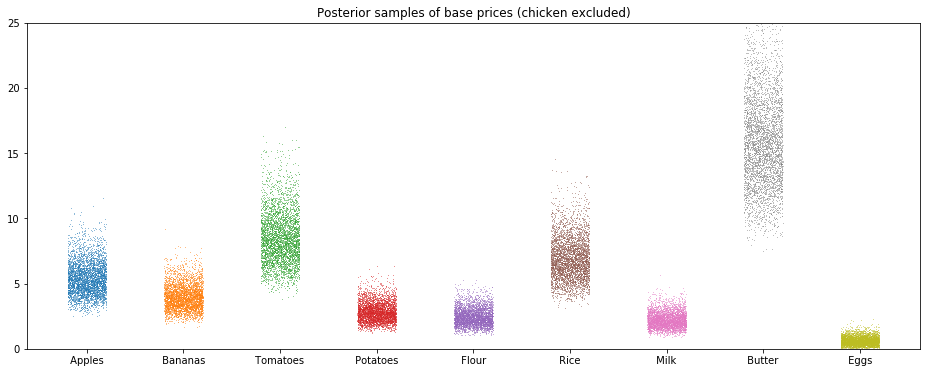

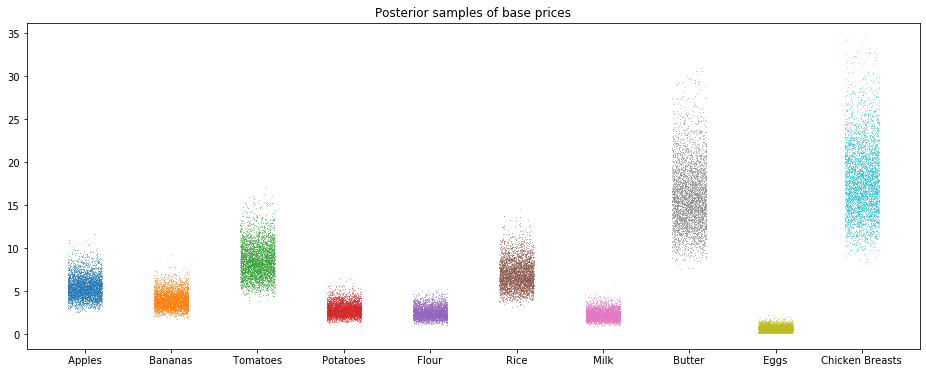

In [167]:
samples = results.extract()

# Plotting posterior base prices (chicken excluded)
plt.figure(figsize=(16,6))
for i in range(len(df["Product"].unique()) - 1):
    plt.plot(sts.uniform.rvs(loc=i+1-0.2, scale=0.4, size=4000), samples['base_price'][:,i], ',', alpha=0.5)
plt.title('Posterior samples of base prices (chicken excluded)')
plt.xticks(range(1, len(df["Product"].unique())), list(mapper['Product'].values()))
plt.ylim(0, 25)
plt.show()

# Plotting posterior base prices
plt.figure(figsize=(16,6))
for i in range(len(df["Product"].unique())):
    plt.plot(sts.uniform.rvs(loc=i+1-0.2, scale=0.4, size=4000), samples['base_price'][:,i], ',', alpha=0.5)
plt.title('Posterior samples of base prices')
plt.xticks(range(1, 1+ len(df["Product"].unique())), list(mapper['Product'].values()))
plt.show()

In [163]:
base_prices = pd.DataFrame({'Average Price':samples["base_price"].mean(axis=0),
                            'Product':list(mapper["Product"].values())})
display(base_prices[["Product", "Average Price"]].round(2))

,Product,Average Price
0,Apples,5.35
1,Bananas,3.90
2,Tomatoes,8.43
3,Potatoes,2.76
4,Flour,2.40
5,Rice,6.84
6,Milk,2.17
7,Butter,15.95
8,Eggs,0.56
9,Chicken Breasts,17.83


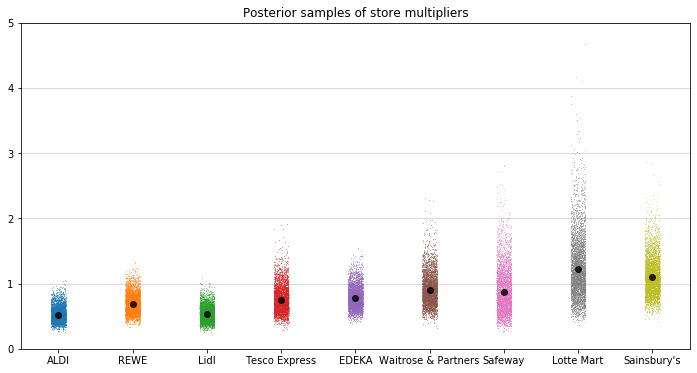

In [164]:
# Plotting posterior neighborhood multipliers
plt.figure(figsize=(12,6))
for i in range(len(df["Store_Name"].unique())):
    plt.plot(sts.uniform.rvs(loc=i+1-0.1, scale=0.2, size=4000), samples['store_multiplier'][:,i], ',', alpha=0.5)
plt.plot(range(1, 1 + len(df["Store_Name"].unique())),samples['store_multiplier'].mean(axis=0), 
         marker='.', linewidth=0,color="black", alpha=0.8, markersize=12)
plt.title('Posterior samples of store multipliers')
plt.xticks(list(mapper['Store_Name'].keys()), list(mapper['Store_Name'].values()))
plt.grid(True, alpha=0.6, axis='y')
plt.ylim(0, 5)
plt.show()


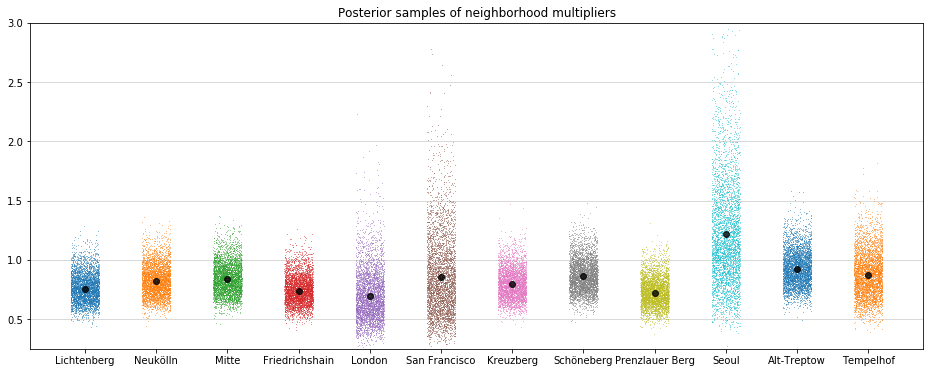

In [165]:
plt.figure(figsize=(16,6))
for i in range(len(df["Neighborhood"].unique())):
    plt.plot(sts.uniform.rvs(loc=i+1-0.2, scale=0.4, size=4000), samples['neighborhood_multiplier'][:,i], ',', alpha=0.5)
plt.plot(range(1, 1 + len(df["Neighborhood"].unique())),samples['neighborhood_multiplier'].mean(axis=0), 
         marker='.', linewidth=0,color="black", alpha=0.8, markersize=12)
plt.title('Posterior samples of neighborhood multipliers')
plt.xticks(list(mapper['Neighborhood'].keys()), list(mapper['Neighborhood'].values()))
plt.ylim(0.25, 3)
plt.grid(True, alpha=0.6, axis='y')
plt.show()


In [136]:
lichtenburg = [739,736,752]
Neukölln = [812,872,820,743,801]
mitte = [1044,1048,1154,1090,1002]
Friedrichshain = [976,877,846,842,942]
Kreuzberg = [865,854,895,941,908]
Schöneberg = [797,705,778,855,844]
Prenzlauer_Berg = [856,893]
alt_Treptow = [743,755,730]
Tempelhof = 760
places = [lichtenburg, Neukölln, mitte, Friedrichshain
          ,Kreuzberg, Schöneberg, Prenzlauer_Berg, alt_Treptow, Tempelhof]
rental_prices1 = list(np.mean(i).round(2) for i in places)
rental_prices1
multipliers = pd.DataFrame({
    "Neighborhood":list(mapper['Neighborhood'].values()), 
    "Mean Multiplier":samples['neighborhood_multiplier'].mean(axis=0)}).drop([4,5,8,10], axis=0).reset_index(drop=True)

price_variation1 = pd.concat([multipliers, pd.DataFrame({"Real Estate Prices":rental_prices1})], axis=1)
    
display(price_variation1)
cor = sts.pearsonr(price_variation1["Mean Multiplier"],price_variation1["Real Estate Prices"])[0]
print("Real estate prices and mean posterior neighborhood multipliers have a Pearson correlation coefficient of {:.2f}.".\
      format(cor))

,Neighborhood,Mean Multiplier,Real Estate Prices
0,Lichtenberg,0.791207,742.33
1,Neukölln,0.859718,809.60
2,Mitte,0.881381,1067.60
3,Friedrichshain,0.781540,896.60
4,Kreuzberg,0.835687,892.60
5,Schöneberg,0.904345,795.80
6,Prenzlauer Berg,0.762641,874.50
7,Alt-Treptow,0.965713,742.67
8,Tempelhof,0.896213,760.00


Real estate prices and mean posterior neighborhood multipliers have a Pearson correlation coefficient of -0.22.


Text(0.5, 1.0, 'Scatter plot of Mean Area Multiplier Factor vs Mean Area Rental Prices')

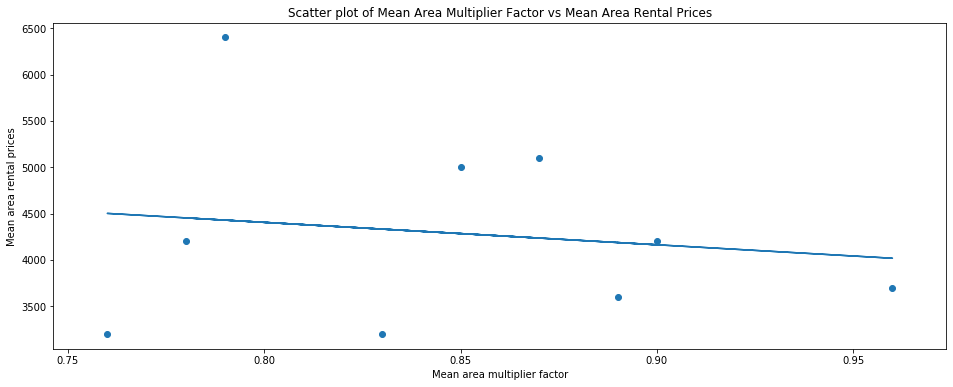

In [137]:
x = price_variation['Mean Multiplier']
y = price_variation['Real Estate Prices']
b, m = np.polynomial.polynomial.polyfit(x, y, 1)
area_dict = price_variation['Neighborhood']

area_names = [v for k,v in area_dict.items()]

plt.figure(figsize = (16,6))
plt.scatter(x,y)
plt.plot(x, b + m * x, '-')
plt.xlabel("Mean area multiplier factor")
plt.ylabel("Mean area rental prices")
plt.title("Scatter plot of Mean Area Multiplier Factor vs Mean Area Rental Prices")

In [125]:
0.25/(3-1)

0.125